In [22]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [23]:
# load the dataset
data = pd.read_csv('boardGamesData.csv')

# get some information about the data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81312 entries, 0 to 81311
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    81312 non-null  int64  
 1   type                  81312 non-null  object 
 2   name                  81271 non-null  object 
 3   yearpublished         81309 non-null  float64
 4   minplayers            81309 non-null  float64
 5   maxplayers            81309 non-null  float64
 6   playingtime           81309 non-null  float64
 7   minplaytime           81309 non-null  float64
 8   maxplaytime           81309 non-null  float64
 9   minage                81309 non-null  float64
 10  users_rated           81312 non-null  int64  
 11  average_rating        81312 non-null  float64
 12  bayes_average_rating  81312 non-null  float64
 13  total_owners          81312 non-null  int64  
 14  total_traders         81312 non-null  int64  
 15  total_wanters      

### Understanding and refining the data

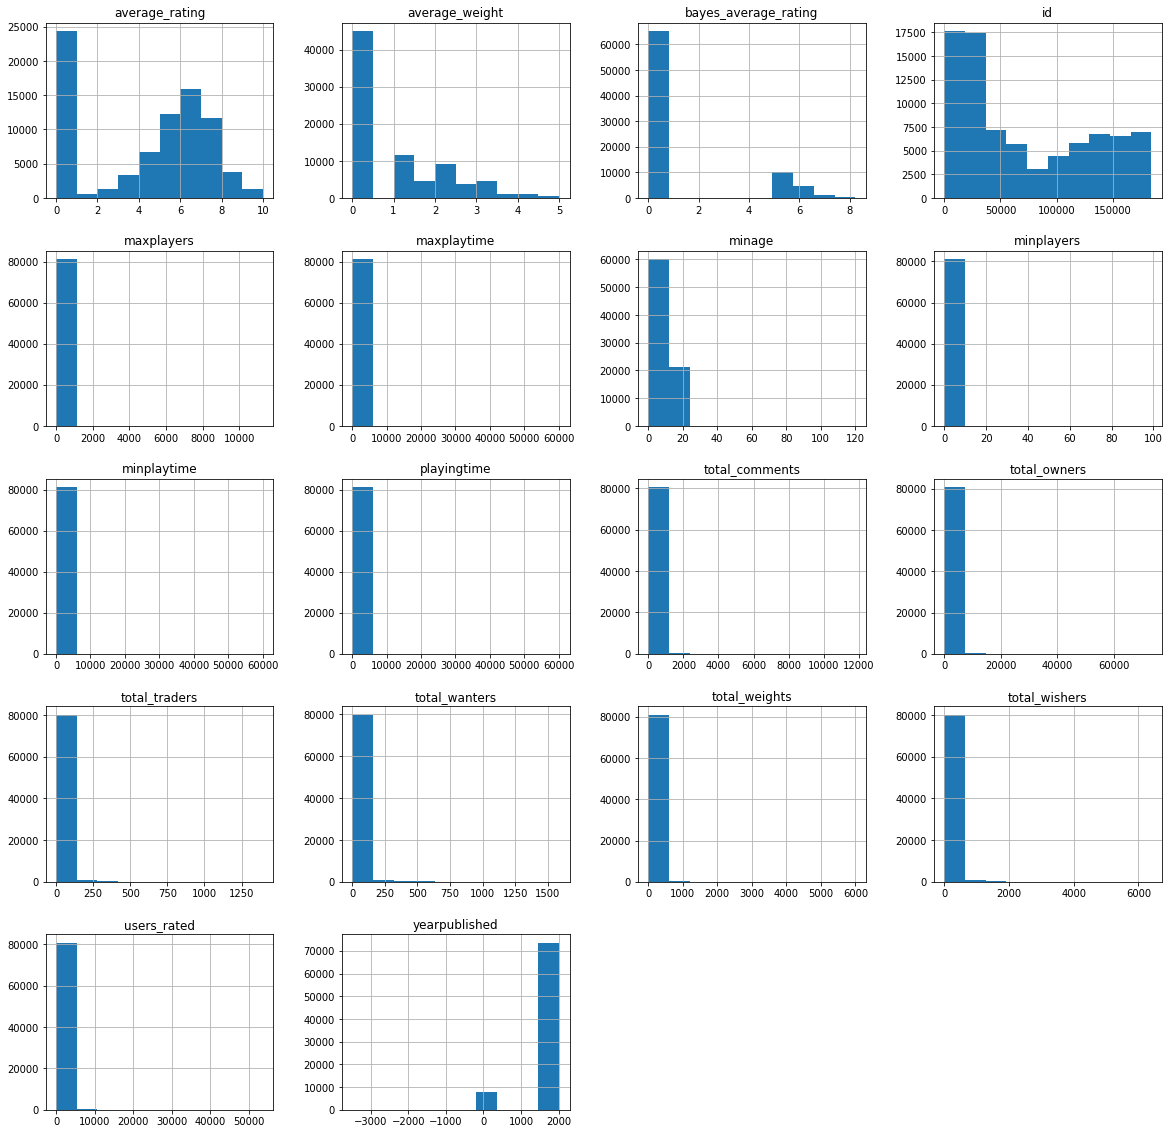

In [24]:
#plot histogram of each column
data.hist(figsize=(20, 20))
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

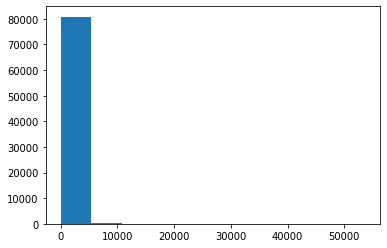

In [25]:
# no. of users who rated certain game
plt.hist(data['users_rated'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

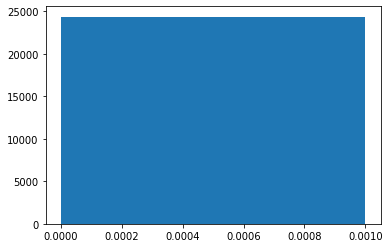

In [26]:
bins_list = [0, 0.001]
plt.hist(data['users_rated'], bins=bins_list)
plt.show

In [27]:
# print the games without any user review
print(data[data['users_rated'] == 0].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24380 entries, 13048 to 81311
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    24380 non-null  int64  
 1   type                  24380 non-null  object 
 2   name                  24375 non-null  object 
 3   yearpublished         24379 non-null  float64
 4   minplayers            24379 non-null  float64
 5   maxplayers            24379 non-null  float64
 6   playingtime           24379 non-null  float64
 7   minplaytime           24379 non-null  float64
 8   maxplaytime           24379 non-null  float64
 9   minage                24379 non-null  float64
 10  users_rated           24380 non-null  int64  
 11  average_rating        24380 non-null  float64
 12  bayes_average_rating  24380 non-null  float64
 13  total_owners          24380 non-null  int64  
 14  total_traders         24380 non-null  int64  
 15  total_wanters  

In [28]:
# remove the games with no user review
data = data[data['users_rated'] != 0]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56932 entries, 0 to 81279
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    56932 non-null  int64  
 1   type                  56932 non-null  object 
 2   name                  56896 non-null  object 
 3   yearpublished         56930 non-null  float64
 4   minplayers            56930 non-null  float64
 5   maxplayers            56930 non-null  float64
 6   playingtime           56930 non-null  float64
 7   minplaytime           56930 non-null  float64
 8   maxplaytime           56930 non-null  float64
 9   minage                56930 non-null  float64
 10  users_rated           56932 non-null  int64  
 11  average_rating        56932 non-null  float64
 12  bayes_average_rating  56932 non-null  float64
 13  total_owners          56932 non-null  int64  
 14  total_traders         56932 non-null  int64  
 15  total_wanters      

In [29]:
# drop the missing values
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56894 entries, 0 to 81279
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    56894 non-null  int64  
 1   type                  56894 non-null  object 
 2   name                  56894 non-null  object 
 3   yearpublished         56894 non-null  float64
 4   minplayers            56894 non-null  float64
 5   maxplayers            56894 non-null  float64
 6   playingtime           56894 non-null  float64
 7   minplaytime           56894 non-null  float64
 8   maxplaytime           56894 non-null  float64
 9   minage                56894 non-null  float64
 10  users_rated           56894 non-null  int64  
 11  average_rating        56894 non-null  float64
 12  bayes_average_rating  56894 non-null  float64
 13  total_owners          56894 non-null  int64  
 14  total_traders         56894 non-null  int64  
 15  total_wanters      

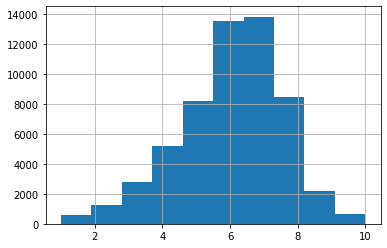

In [30]:
#plot hostogram of average rating after removing the games with no user reviews
data['average_rating'].hist()
plt.show()

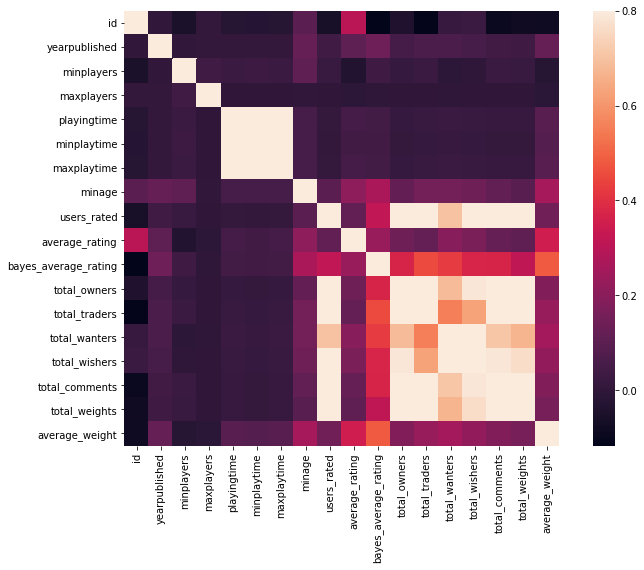

In [31]:
# plot the correlation matrix to see the correlation between different columns
corr = data.corr()
fig = plt.figure(figsize=(12, 8))
sns.heatmap(corr, vmax=0.8, square=True)
plt.show()

In [32]:
# get all the relevent columns from the DataFrame
columns = data.columns.tolist()

# filter the columns to remove the data we don't need
columns = [c for c in columns if c not in ['id', 'type', 'name', 'average_rating', 'bayes_average_rating']]

# store the labels separetely
target = 'average_rating'

x = data[columns]
y = data[target]

print(x.shape)
print(y.shape)

(56894, 15)
(56894,)


In [33]:
# split the dataset to training and tesing datasets
seed = 1
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(45515, 15)
(45515,)
(11379, 15)
(11379,)


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [35]:
# define the models

modelNames = ['Linear Regression', 'Random Forest Regression', 'RBF Support Vector Regression']

classifiers = [LinearRegression(),
               RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=seed),
               SVR(kernel='rbf')]

models = list(zip(modelNames, classifiers))
#print(models)

In [19]:
# training and testing

for name, model in models:
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print(name)
    
    # print the mean squared error
    print(mean_squared_error((y_test), predictions))

Linear Regression
2.0878654278597417
Random Forest Regression
1.4575588917181705
RBF Support Vector Regression
2.0580177790637606
